###### **Some setup**

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_data_from_csv(result_dir, file_type, file_list):
    li = []
    for file in file_list:
        file_path = result_dir + file + file_type
        df = pd.read_csv(file_path, index_col= None, header=0)
        li.append(df)

    data = pd.concat(li, axis=0, ignore_index=True)
    return data 

In [3]:
easy_result_dir = "../easy_result/"
hard_result_dir = "../hard_result/"

In [13]:
easy_gurobi_result_dir = easy_result_dir + "gurobi/density_0.6/seed_1/"
easy_mlbin_result_dir = easy_result_dir + "mlbin/density_0.6/seed_1/"
easy_aco_result_dir = easy_result_dir + "aco/density_0.6/seed_1/"

hard_gurobi_result_dir = hard_result_dir + "gurobi/density_0.6/seed_1/"
hard_mlbin_result_dir = hard_result_dir + "mlbin/density_0.6/seed_1/"
hard_aco_result_dir = hard_result_dir + "aco/density_0.6/seed_1/"

In [5]:
def read_data_from_csv(result_dir, file_type):
    li = []
    file_list =[]
    all_file_list = os.listdir(result_dir) 
    for file in all_file_list:
        if file_type in file:
            file_list.append(file)
    for file in file_list:
        file_path = result_dir + file
        df = pd.read_csv(file_path, index_col= None, header=0)
        li.append(df)

    data = pd.concat(li, axis=0, ignore_index=True)
    return data 

## Basic Dataset info

### easy

In [239]:
easy_solving_stats = read_data_from_csv(easy_gurobi_result_dir, "_solving_stats.csv")
print("number of item in easy dataset", easy_solving_stats["nitems"].unique())
print("capacity in easy dataset", easy_solving_stats["capacity"].unique())

number of item in easy dataset [120 100]
capacity in easy dataset [1000]


### hard

In [240]:
hard_solving_stats = read_data_from_csv(hard_gurobi_result_dir, "_solving_stats.csv")
print("number of item in hard dataset", hard_solving_stats["nitems"].unique())
print("capacity in hard dataset", hard_solving_stats["capacity"].unique())

number of item in hard dataset [1000  500  201]
capacity in hard dataset [ 150 2036 2032 2020 2400 2428 2012 2356 2328 1916 2000 2456 1860 2472
 1864 2068 1996 2464 2492 2028 1940 2404 1972 1888 2064 2048 1976 1956
 2052]


## Easy dataset result analysis

### solving stats

In [9]:
easy_gurobi_solving_stats = read_data_from_csv(easy_gurobi_result_dir, "_solving_stats.csv")
easy_mlbin_solving_stats = read_data_from_csv(easy_mlbin_result_dir, "_solving_stats.csv")
easy_aco_solving_stats = read_data_from_csv(easy_aco_result_dir, "_solving_stats.csv")

In [21]:
# if any intances cannot be solved to optimality
print(easy_gurobi_solving_stats["optimality"].value_counts())
print(easy_mlbin_solving_stats["optimality"].value_counts())
print(easy_aco_solving_stats["optimality"].value_counts())

print("All intances in easy test sets are solved")

optimality
1    200
Name: count, dtype: int64
optimality
1    200
Name: count, dtype: int64
optimality
1    200
Name: count, dtype: int64
All intances in easy test sets are solved


### cg stats

## Hard dataset result analysis

### solving stats

In [14]:
hard_gurobi_solving_stats = read_data_from_csv(hard_gurobi_result_dir, "_solving_stats.csv")
hard_mlbin_solving_stats = read_data_from_csv(hard_mlbin_result_dir, "_solving_stats.csv")
hard_aco_solving_stats = read_data_from_csv(hard_aco_result_dir, "_solving_stats.csv")

In [47]:
# if any intances cannot be solved to optimality
print(hard_gurobi_solving_stats["optimality"].value_counts())
print(hard_mlbin_solving_stats["optimality"].value_counts())
print(hard_aco_solving_stats["optimality"].value_counts())

print("--------------------------------------------------------")
print("Total number of hard test data is 90")
print("All instances can be solved to optimality by MLBIN and ACO, 77 can be solved by Gurobi")

optimality
1    77
0    13
Name: count, dtype: int64
optimality
1    90
Name: count, dtype: int64
optimality
1    90
Name: count, dtype: int64
--------------------------------------------------------
Total number of hard test data is 90
All instances can be solved to optimality by MLBIN and ACO, 77 can be solved by Gurobi


In [251]:
hard_gurobi_solving_stats[hard_gurobi_solving_stats.optimality == 0]

,nitems,capacity,optimality,lp_obj,tot_time,tot_cpu_time,master_duration,heur_pricing_duration,exact_pricing_duration,#CG_iter,#added_columns,#heur_success
0,1000,150,0,440.838,600.963,1408.220,68.0144,532.875,0,111,368,111
7,1000,150,0,437.687,608.168,1091.650,66.1970,541.898,0,114,393,114
9,1000,150,0,432.918,606.596,1164.430,67.1239,539.397,0,115,389,115
14,1000,150,0,436.527,601.880,994.732,75.8687,525.936,0,125,414,125
17,1000,150,0,445.215,608.493,1504.480,62.7009,545.718,0,106,352,106
21,1000,150,0,435.153,601.514,876.841,79.4049,522.035,0,130,425,130
24,1000,150,0,446.747,600.829,857.132,74.8423,525.912,0,125,401,125
29,1000,150,0,443.309,601.885,1140.670,61.7331,540.081,0,110,347,110
32,1000,150,0,439.013,604.469,1129.910,68.7035,535.691,0,116,359,116
57,1000,150,0,437.949,601.603,909.236,77.3884,524.139,0,132,402,132


#### solved hard test analysis

###### Total time used to solve instances

In [32]:
solved_hard_gurobi = hard_gurobi_solving_stats[hard_gurobi_solving_stats.optimality == 1]
solved_hard_mlbin = hard_mlbin_solving_stats[hard_gurobi_solving_stats.optimality == 1]
solved_hard_aco = hard_aco_solving_stats[hard_gurobi_solving_stats.optimality == 1]

In [41]:
solved_hard_tot_time_cumsum_gurobi = solved_hard_gurobi.tot_time.cumsum()
solved_hard_tot_time_cumsum_mlbin = solved_hard_mlbin.tot_time.cumsum()
solved_hard_tot_time_cumsum_aco = solved_hard_aco.tot_time.cumsum()

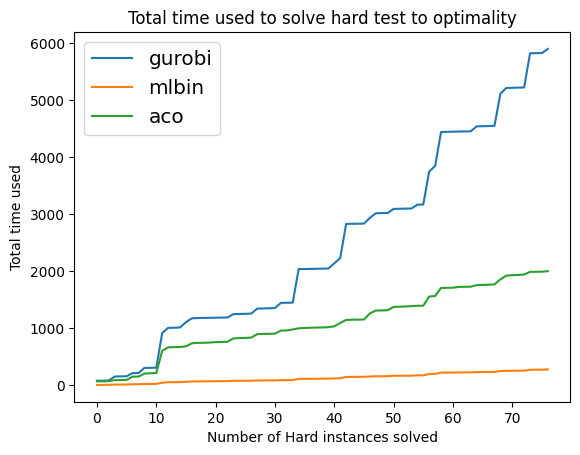

In [68]:
fig, ax = plt.subplots()
ax.plot(np.arange(solved_hard_gurobi.shape[0]), np.array(solved_hard_tot_time_cumsum_gurobi), label = "gurobi")
ax.plot(np.arange(solved_hard_mlbin.shape[0]), np.array(solved_hard_tot_time_cumsum_mlbin), label = "mlbin")
ax.plot(np.arange(solved_hard_aco.shape[0]), np.array(solved_hard_tot_time_cumsum_aco), label = "aco")
legend = ax.legend(loc='upper left', fontsize='x-large')
plt.xlabel('Number of Hard instances solved')
plt.ylabel('Total time used')
plt.title("Total time used to solve hard test to optimality")
plt.show()

### cg stats - Falkenauer_u1000

In [241]:
u1000_file_name = []
for file in os.listdir("../test_data/hard_test_data"):
    if "Falkenauer_u100" in file:
        u1000_file_name.append(file[:-4])

In [243]:
mlbin_lp_obj = []
mlbin_cgiter = []
mlbin_cur_time = []

gurobi_lp_obj = []
gurobi_cgiter = []
gurobi_cur_time = []

aco_lp_obj = []
aco_cgiter = []
aco_cur_time = []


for u1000_file in u1000_file_name:
    u1000_obj = []
    u1000_cgiter = []
    u1000_cur_time = []
    df = pd.read_csv("../hard_result/mlbin/density_0.6/seed_1/" + u1000_file + "_cg_stats.csv", index_col= None, header=0)
    for index, row in df.iterrows():
        u1000_obj.append(row['lp_obj'])
        u1000_cgiter.append(row['ith_CG_iter'])
        u1000_cur_time.append(row['current_time'])
    mlbin_lp_obj.append(u1000_obj)
    mlbin_cgiter.append(u1000_cgiter)
    mlbin_cur_time.append(u1000_cur_time)

for u1000_file in u1000_file_name:
    u1000_obj = []
    u1000_cgiter = []
    u1000_cur_time = []
    df = pd.read_csv("../hard_result/aco/density_0.6/seed_1/" + u1000_file + "_cg_stats.csv", index_col= None, header=0)
    for index, row in df.iterrows():
        u1000_obj.append(row['lp_obj'])
        u1000_cgiter.append(row['ith_CG_iter'])
        u1000_cur_time.append(row['current_time'])
    aco_lp_obj.append(u1000_obj)
    aco_cgiter.append(u1000_cgiter)
    aco_cur_time.append(u1000_cur_time)

for u1000_file in u1000_file_name:
    u1000_obj = []
    u1000_cgiter = []
    u1000_cur_time = []
    df = pd.read_csv("../hard_result/gurobi/density_0.6/seed_1/" + u1000_file + "_cg_stats.csv", index_col= None, header=0)
    for index, row in df.iterrows():
        u1000_obj.append(row['lp_obj'])
        u1000_cgiter.append(row['ith_CG_iter'])
        u1000_cur_time.append(row['current_time'])
    gurobi_lp_obj.append(u1000_obj)
    gurobi_cgiter.append(u1000_cgiter)
    gurobi_cur_time.append(u1000_cur_time)

In [250]:
def pad(list, content, width):
    list.extend([content] * (width - len(list)))
    return list

def transform_list_to_array(input_2dlist):
    new_list = []
    longest_length = max(len(elem) for elem in input_2dlist)
    for l in input_2dlist:
        rh_value = l[len(l)-1]
        padded_l = pad(l, rh_value, longest_length)
        new_list.append(padded_l)
    return new_list

In [249]:
mlbin_lp_obj = transform_list_to_array(mlbin_lp_obj)
gurobi_lp_obj = transform_list_to_array(gurobi_lp_obj)
aco_lp_obj = transform_list_to_array(aco_lp_obj)

mlbin_cgiter = transform_list_to_array(mlbin_cgiter)
gurobi_cgiter = transform_list_to_array(gurobi_cgiter)
aco_cgiter = transform_list_to_array(aco_cgiter)

mlbin_cur_time = transform_list_to_array(mlbin_cur_time)
gurobi_cur_time = transform_list_to_array(gurobi_cur_time)
aco_cur_time = transform_list_to_array(aco_cur_time)

In [218]:
mlbin_lp_obj_average = np.nanmean(np.where(mlbin_lp_obj!=0,mlbin_lp_obj,np.nan),0)
gurobi_lp_obj_average = np.nanmean(np.where(gurobi_lp_obj!=0,gurobi_lp_obj,np.nan),0)
aco_lp_obj_average = np.nanmean(np.where(aco_lp_obj!=0,aco_lp_obj,np.nan),0)

mlbin_cgiter_average = np.nanmean(np.where(mlbin_cgiter!=0,mlbin_cgiter,np.nan),0)
gurobi_cgiter_average = np.nanmean(np.where(gurobi_cgiter!=0,gurobi_cgiter,np.nan),0)
aco_cgiter_average = np.nanmean(np.where(aco_cgiter!=0,aco_cgiter,np.nan),0)

mlbin_cur_time_average = np.nanmean(np.where(mlbin_cur_time!=0,mlbin_cur_time,np.nan),0)
gurobi_cur_time_average = np.nanmean(np.where(gurobi_cur_time!=0,gurobi_cur_time,np.nan),0)
aco_cur_time_average = np.nanmean(np.where(aco_cur_time!=0,aco_cur_time,np.nan),0)

##### LP objective over iteration

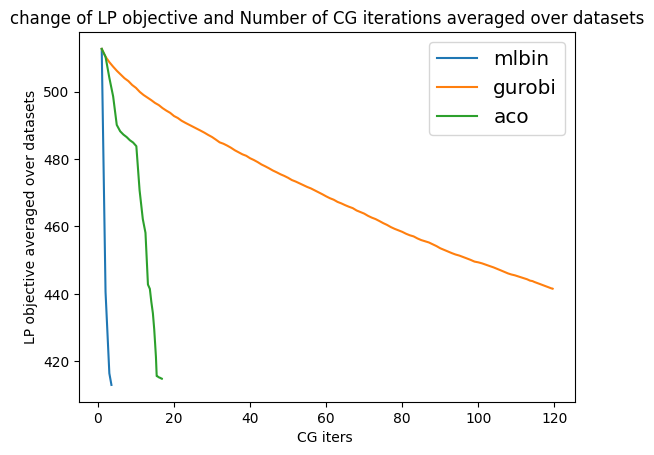

In [236]:
fig, ax = plt.subplots()
ax.plot(mlbin_cgiter_average, mlbin_lp_obj_average, label="mlbin")
ax.plot(gurobi_cgiter_average, gurobi_lp_obj_average, label="gurobi")
ax.plot(aco_cgiter_average, aco_lp_obj_average, label="aco")
legend = ax.legend(loc='upper right', fontsize='x-large')
plt.xlabel('CG iters ')
plt.ylabel('LP objective averaged over datasets')
plt.title("change of LP objective and Number of CG iterations averaged over datasets")
plt.show()

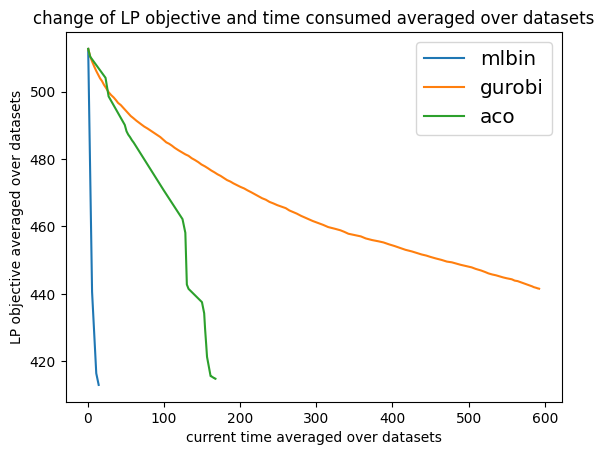

In [238]:
fig, ax = plt.subplots()
ax.plot(mlbin_cur_time_average, mlbin_lp_obj_average, label="mlbin")
ax.plot(gurobi_cur_time_average, gurobi_lp_obj_average, label="gurobi")
ax.plot(aco_cur_time_average, aco_lp_obj_average, label="aco")
legend = ax.legend(loc='upper right', fontsize='x-large')
plt.xlabel('current time averaged over datasets')
plt.ylabel('LP objective averaged over datasets')
plt.title("change of LP objective and time consumed averaged over datasets")
plt.show()